# Laboratorium 12

## Import zależności

In [1]:
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
import math

## Funkcje pomocnicze

In [2]:
def apply_linspace(fun, start,end):
    lin = np.linspace(start, end, end * 50 + 1)
    return lin, fun(lin)

## Funkcje testowe

$$
f_1(x) = e ^{-x^2}(ln x)^2
$$

In [3]:
f1 = lambda x: np.exp(-1 * x ** 2) * (np.log(x) ** 2)

$$
f_2(x) = \frac{1}{x^3-2x-5}
$$

In [4]:
f2 = lambda x: 1 / (x ** 3 - 2 * x - 5)

$$
f_3(x) = x^5e^{-x}sinx
$$

In [5]:
f3 = lambda x: x ** 5 * np.exp(-x) * np.sin(x)

$$
f_4(x, y) = \frac{1}{\sqrt{x+y}(1+x+y)}, 0\leq x\leq 1, 0\leq y\leq 1-x
$$

In [6]:
f4 = lambda x, y: 1 / (np.sqrt(x+y) * (1 + x + y))

$$
f_5(x, y) = x^2+y^2, -3\leq x\leq 3, -5\leq y\leq 5
$$

In [7]:
f5 = lambda x, y: x ** 2 + y ** 2 

## Zadanie 1

#### Całkowanie metodą trapezów

In [8]:
def trapezoidal(x, y):
    delta = (x[-1] - x[0]) / (x.shape[0] - 1)
    res = delta * np.sum(y[0:-1] + y[1:], axis=0)  / 2
    return res

#### Funkcja obliczająca przebytą drogę

In [9]:
def distance(velocity, time):
    if len(velocity) != len(time):
        raise Exception('Length of arguments must be the same.')
    velocity = np.asarray(velocity) / 3600 # to km/s
    return trapezoidal(velocity, np.cumsum(time))

#### Test działania

Całkowanie funkcji testowych

In [10]:
x, y = apply_linspace(f1,1,10)
trapezoidal(x, y)

0.01446512465763016

In [11]:
integrate.simps(y, x)

0.014465129481818297

In [12]:
x, y = apply_linspace(f2,5,50)
trapezoidal(x, y)

0.02101587828937983

In [13]:
integrate.simps(y, x)

0.021015715414582258

In [14]:
x, y = apply_linspace(f3,1,100)
trapezoidal(x, y)

-15.052717083136733

In [15]:
integrate.simps(y, x)

-15.052670143616899

Przebyta droga

In [16]:
x = np.random.rand(10) * 100
print(x)
y = np.asarray([5,15,20,10,40,5,60,10,20,15]) * 60
y[0] = 0
print(y)

[71.68948264 97.23715346 77.08685636 43.92888282 98.29892299 47.70567691
 31.06046417 59.20998841 16.39974429 34.81572175]
[   0  900 1200  600 2400  300 3600  600 1200  900]


In [17]:
own_impl = distance(x, y)
print(own_impl)

-58.55416659613573


In [18]:
lib_impl = integrate.cumtrapz(x / 3600, np.cumsum(y))
print(lib_impl[-1])

179.6564333126085


Przebyta droga jest polem pod wykresem prędkości chwilowej względem czasu

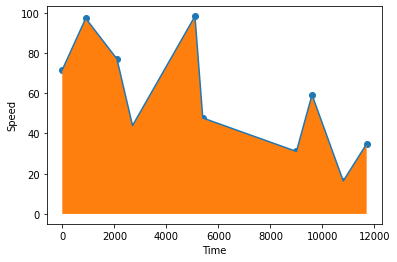

In [19]:
fig, ax = plt.subplots()
y = np.cumsum(y)
ax.scatter(y,x)
ax.plot(y,x)
ax.fill_between(y,0,x)
ax.set_ylabel('Speed')
ax.set_xlabel('Time')
plt.show()

## Zadanie 2

#### Kwadratura Simpsona

In [20]:
def simpson(x, y):
    x, y = np.asarray(x), np.asarray(y)
    if x.shape[0] != y.shape[0] or y.shape[0] % 2 == 0:
        raise Exception('Wrong arguments length.')
    
    delta = (x[-1] - x[0]) / (x.shape[0] - 1)
    res = delta * np.sum(y[0:-1:2] + 4 * y[1::2] + y[2::2], axis=0) / 3
    return res    

#### Test działania

Pierwsza funkcja

In [21]:
x, y = apply_linspace(f1,1,10)
simpson(x, y)

0.014465129481818296

In [22]:
integrate.simps(y, x)

0.014465129481818297

In [23]:
integrate.quad(f1,1,10)[0]

0.014465125622944034

Druga funkcja

In [24]:
x, y = apply_linspace(f2,5,50)
simpson(x, y)

0.021015715414582258

In [25]:
integrate.simps(y, x)

0.021015715414582258

In [26]:
integrate.quad(f2,5,50)[0]

0.021015715410753522

Trzecia funkcja

In [27]:
x, y = apply_linspace(f3,1,100)
simpson(x, y)

-15.052670143616895

In [28]:
integrate.simps(y, x)

-15.052670143616899

In [29]:
integrate.quad(f3,1,100)[0]

-15.052670137653434

#### Wnioski

Kwadratura Simpsona wykazuje się dużo wyższą dokładnością niż całkowanie metodą trapezów. 

Prosta implementacja pozwala uzyskać wyniki dokładności porównywalnej do funkcji bibliotecznych.

## Zadanie 3

#### Oznaczone całki podwójne

In [30]:
def trapezoidal_2d(x, y, fun):
    return trapezoidal(x, trapezoidal(y, fun(x[:,None], y)))

In [31]:
def simpson_2d(x, y, fun):
    return simpson(x, simpson(y, fun(x[:,None], y)))

#### Test działania dla funkcji testowych

**Funkcja czwarta**

Funkcję czwartą scałkować należy w zakresie  $ 0 < x\leq 1, 0 < y\leq 1-x$



Na poniższym wykresie oznaczono ten zakres.

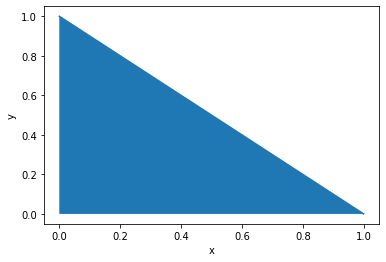

In [32]:
lin = np.linspace(0,1,101)
plt.plot(lin, 1 - lin)
plt.fill_between(1-lin,0,lin)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

Zauważmy, że jeśli rozepniemy funkcję pomiędzy wektorem x i wektorem y o wartościach z zakresu (0,1), to interesujący nas zakres odpowiadał będzie trójkątnemu fragmentowi macierzy. Przy pomocy biblioteki numpy możemy uzyskać taki fragment.

In [33]:
x = np.linspace(0.0001, 1, 11)
y = np.linspace(0.0001, 1, 11)

In [34]:
x[:, None]

array([[1.0000e-04],
       [1.0009e-01],
       [2.0008e-01],
       [3.0007e-01],
       [4.0006e-01],
       [5.0005e-01],
       [6.0004e-01],
       [7.0003e-01],
       [8.0002e-01],
       [9.0001e-01],
       [1.0000e+00]])

In [35]:
y

array([1.0000e-04, 1.0009e-01, 2.0008e-01, 3.0007e-01, 4.0006e-01,
       5.0005e-01, 6.0004e-01, 7.0003e-01, 8.0002e-01, 9.0001e-01,
       1.0000e+00])

In [36]:
a = f4(x[:, None], y)
print(a)

[[70.69653881  2.8715747   1.86227268  1.40383549  1.12903004  0.94257339
   0.80670683  0.70295662  0.62104201  0.55471954  0.49995   ]
 [ 2.8715747   1.86227268  1.40383549  1.12903004  0.94257339  0.80670683
   0.70295662  0.62104201  0.55471954  0.49995     0.45399177]
 [ 1.86227268  1.40383549  1.12903004  0.94257339  0.80670683  0.70295662
   0.62104201  0.55471954  0.49995     0.45399177  0.41491241]
 [ 1.40383549  1.12903004  0.94257339  0.80670683  0.70295662  0.62104201
   0.55471954  0.49995     0.45399177  0.41491241  0.3813077 ]
 [ 1.12903004  0.94257339  0.80670683  0.70295662  0.62104201  0.55471954
   0.49995     0.45399177  0.41491241  0.3813077   0.35213126]
 [ 0.94257339  0.80670683  0.70295662  0.62104201  0.55471954  0.49995
   0.45399177  0.41491241  0.3813077   0.35213126  0.32658666]
 [ 0.80670683  0.70295662  0.62104201  0.55471954  0.49995     0.45399177
   0.41491241  0.3813077   0.35213126  0.32658666  0.30405668]
 [ 0.70295662  0.62104201  0.55471954  0.499

In [37]:
np.flip(np.tril(np.flip(a, axis=1).T).T, axis=1)

array([[70.69653881,  2.8715747 ,  1.86227268,  1.40383549,  1.12903004,
         0.94257339,  0.80670683,  0.70295662,  0.62104201,  0.55471954,
         0.49995   ],
       [ 2.8715747 ,  1.86227268,  1.40383549,  1.12903004,  0.94257339,
         0.80670683,  0.70295662,  0.62104201,  0.55471954,  0.49995   ,
         0.        ],
       [ 1.86227268,  1.40383549,  1.12903004,  0.94257339,  0.80670683,
         0.70295662,  0.62104201,  0.55471954,  0.49995   ,  0.        ,
         0.        ],
       [ 1.40383549,  1.12903004,  0.94257339,  0.80670683,  0.70295662,
         0.62104201,  0.55471954,  0.49995   ,  0.        ,  0.        ,
         0.        ],
       [ 1.12903004,  0.94257339,  0.80670683,  0.70295662,  0.62104201,
         0.55471954,  0.49995   ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.94257339,  0.80670683,  0.70295662,  0.62104201,  0.55471954,
         0.49995   ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

Tak przygotowaną funkcję możemy scałkować wcześniej przygotowanymi metodami.

10 węzłów siatki

In [38]:
x = np.linspace(0.0001, 1, 11)
y = np.linspace(0.0001, 1, 11)

In [39]:
fun = np.flip(np.tril(np.flip(f4(x[:,None], y), axis=1).T).T, axis=1)

Metoda trapezów

In [40]:
trapezoidal(x, trapezoidal(y, fun))

0.6216958683974788

Kwadratura Simpsona

In [41]:
simpson(x, simpson(y, fun))

0.5264025118920416

Funkcja biblioteczna

In [42]:
integrate.dblquad(f4, 0.0001, 1, lambda _: 0, lambda x: 1-x)[0]

0.4290479268795477

100 węzłów siatki

In [43]:
x = np.linspace(0.0001, 1, 101)
y = np.linspace(0.0001, 1, 101)

In [44]:
fun = np.flip(np.tril(np.flip(f4(x[:,None], y), axis=1).T).T, axis=1)

Metoda trapezów

In [45]:
trapezoidal(x, trapezoidal(y, fun))

0.4329882342050255

Kwadratura Simpsona

In [46]:
simpson(x, simpson(y, fun))

0.4322566825890586

Funkcja biblioteczna

In [47]:
integrate.dblquad(f4, 0.0001, 1, lambda _: 0, lambda x: 1-x)[0]

0.4290479268795477

1000 węzłów siatki

In [48]:
x = np.linspace(0.0001, 1, 1001)
y = np.linspace(0.0001, 1, 1001)

In [49]:
fun = np.flip(np.tril(np.flip(f4(x[:,None], y), axis=1).T).T, axis=1)

Metoda trapezów

In [50]:
trapezoidal(x, trapezoidal(y, fun))

0.4292060421985883

Kwadratura Simpsona

In [51]:
simpson(x, simpson(y, fun))

0.42922297730008657

Funkcja biblioteczna

In [52]:
integrate.dblquad(f4, 0.0001, 1, lambda _: 0, lambda x: 1-x)[0]

0.4290479268795477

**Funkcja piąta**

Zakres: $-3 \leq x \leq 3 \land -5 \leq y \leq 5$

10 węzłów siatki

In [53]:
x = np.linspace(-3, 3, 11)
y = np.linspace(-5, 5, 11)

In [54]:
trapezoidal_2d(x, y, f5)

693.6

In [55]:
simpson_2d(x, y, f5)

680.0

In [56]:
integrate.dblquad(f5, -3, 3, lambda _: -5, lambda _: 5)[0]

680.0

100 węzłów siatki

In [57]:
x = np.linspace(-3, 3, 101)
y = np.linspace(-5, 5, 101)

Metoda trapezów

In [58]:
trapezoidal_2d(x, y, f5)

680.136

Kwadratura Simpsona

In [59]:
simpson_2d(x, y, f5)

680.0000000000001

Funkcja biblioteczna

In [60]:
integrate.dblquad(f5, -3, 3, lambda _: -5, lambda _: 5)[0]

680.0

1000 węzłów siatki

In [61]:
x = np.linspace(-3, 3, 1001)
y = np.linspace(-5, 5, 1001)

In [62]:
trapezoidal_2d(x, y, f5)

680.00136

In [63]:
simpson_2d(x, y, f5)

680.0

In [64]:
integrate.dblquad(f5, -3, 3, lambda _: -5, lambda _: 5)[0]

680.0

### Wnioski

Dokładność przybliżenia całki podwójnej metodą trapezów rośnie wraz ze wzrostem liczby węzłów siatki. Wartości porównywalne z funkcja biblioteczną otrzymujemy dla siatek stworzonych z ponad tysiąca węzłów. 